<a href="https://colab.research.google.com/github/IngerMasha/week8_day2/blob/main/Mini_Project_1_Machine_Learning_For_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

file_path = '/content/survey.csv'
data = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(data.head())

print("\nDataset info:")
print(data.info())

print("\nData distribution summary:")
print(data.describe())

First few rows of the dataset:
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        N

In [8]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_distribution = data.groupby('Age_Group')['treatment'].value_counts(normalize=True).unstack()

print("\nDistribution of mental treatment by age group:")
print(age_distribution)




Distribution of mental treatment by age group:
treatment        No       Yes
Age_Group                    
<20        0.600000  0.400000
20-29      0.524237  0.475763
30-39      0.482824  0.517176
40-49      0.426230  0.573770
50-59      0.318182  0.681818
60+        0.500000  0.500000


<Figure size 1000x600 with 0 Axes>

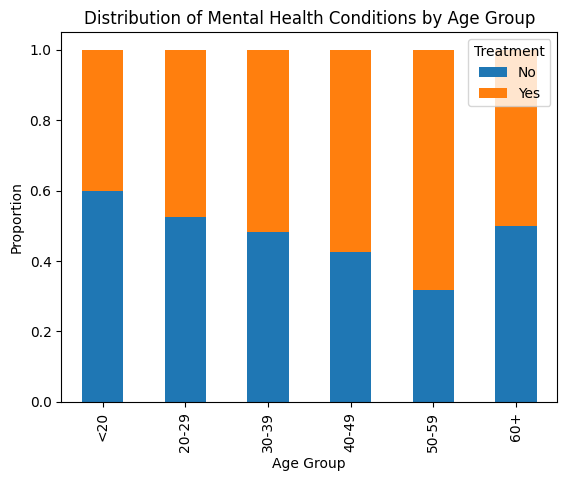

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Mental Health Conditions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Treatment')
plt.show()

In [4]:
gender_distribution = data.groupby('Gender')['treatment'].value_counts(normalize=True).unstack()
print("\nFrequency of mental health issues by gender:")
print(gender_distribution)


Frequency of mental health issues by gender:
treatment                                             No       Yes
Gender                                                            
A little about you                                   NaN  1.000000
Agender                                              NaN  1.000000
All                                                  NaN  1.000000
Androgyne                                            NaN  1.000000
Cis Female                                           NaN  1.000000
Cis Male                                             NaN  1.000000
Cis Man                                              NaN  1.000000
Enby                                                 NaN  1.000000
F                                               0.315789  0.684211
Femake                                          1.000000       NaN
Female                                          0.305785  0.694215
Female                                          0.500000  0.500000
Female (cis)    

<Figure size 1000x1200 with 0 Axes>

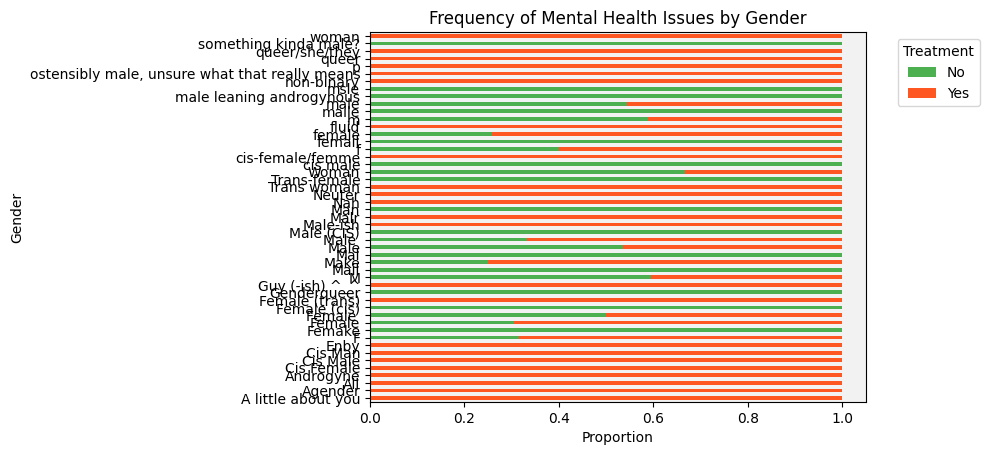

In [13]:
gender_distribution = gender_distribution.dropna(how='all')
plt.figure(figsize=(10, 12))
gender_distribution.plot(kind='barh', stacked=True, color=['#4CAF50', '#FF5722'])
plt.title('Frequency of Mental Health Issues by Gender')
plt.xlabel('Proportion')
plt.ylabel('Gender')
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor('#f2f2f2')
plt.show()

In [5]:
country_distribution = data.groupby('Country')['treatment'].value_counts(normalize=True).unstack()
highest_rate_country = country_distribution['Yes'].idxmax()
lowest_rate_country = country_distribution['Yes'].idxmin()

print("\nCountry with the highest reported rate of mental health issues:")
print(highest_rate_country)

print("\nCountry with the lowest reported rate of mental health issues:")
print(lowest_rate_country)


Country with the highest reported rate of mental health issues:
Bahamas, The

Country with the lowest reported rate of mental health issues:
Italy



Country with the highest reported rate of mental health issues:
Bahamas, The

Country with the lowest reported rate of mental health issues:
Italy


<Figure size 1500x1000 with 0 Axes>

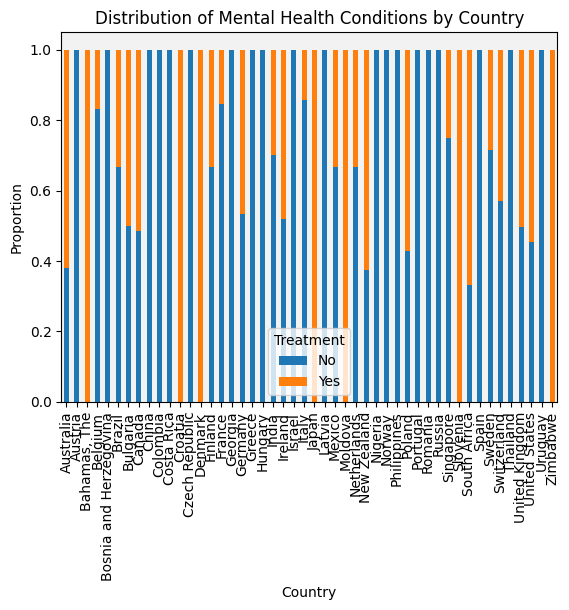

In [12]:
country_distribution = data.groupby('Country')['treatment'].value_counts(normalize=True).unstack()
highest_rate_country = country_distribution['Yes'].idxmax()
lowest_rate_country = country_distribution['Yes'].idxmin()

print("\nCountry with the highest reported rate of mental health issues:")
print(highest_rate_country)

print("\nCountry with the lowest reported rate of mental health issues:")
print(lowest_rate_country)

plt.figure(figsize=(15, 10))
country_distribution.plot(kind='bar', stacked=True)
plt.title('Distribution of Mental Health Conditions by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.legend(title='Treatment')
plt.gca().set_facecolor('#f2f2f2')
plt.show()